## 1. Problem Statement:
Given spam dataset of SMS tagged messages that have been collected for SMS Spam research and tagged as ham (legitimate) or spam, we have to create a Classification Model.

We are using Naive Bayes Classification technique.


## 2. Data loading and description:

### Import the packages

In [1]:
import nltk
nltk.download('stopwords') # Resolve Corpora/stopwords not found issue
from nltk.corpus import stopwords
import string
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prashant.pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import the dataset

In [2]:
messages = pd.read_csv("https://raw.githubusercontent.com/prashant-rocks/Data-Science/master/Machine%20Learning/Naive-Bayes-Multinomial-Classifier-Spam-Dataset/src/data/spam.csv", encoding='latin1')

#Treatment for extra/unwanted commas in v2 column and add-back text from columns:'Unnamed: 2','Unnamed: 3','Unnamed: 4'
messages.update(messages[['Unnamed: 2','Unnamed: 3','Unnamed: 4']].fillna(""))
messages['v2'] = messages.apply(lambda row: (messages['v2'] + " " + messages['Unnamed: 2'] + messages['Unnamed: 3'] + messages['Unnamed: 4']) if len(messages['Unnamed: 2'] + messages['Unnamed: 3'] + messages['Unnamed: 4']) != 0  else messages['v2'])

#Remove unwanted columns as we have already processed text from these to v2
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

#add proper labels
messages.columns = ["labels","message"]

messages.head()


,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Check the columns present in the dataset

In [296]:
messages.columns

Index(['labels', 'message'], dtype='object')

### Check the shape of the dataset

In [297]:
messages.shape

(5572, 2)

### Check the descriptive statistics of the given dataset

In [298]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [299]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                            Sorry, I'll call later    30
spam       747    653  Please call our customer service representativ...    4

### Check the info of the dataset

In [301]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


## 3. Data Interpretation and Visualization:

### Check for the missing value present in the dataset


In [302]:
messages.isnull().sum().any()

False

Now check the correlation w.r.t. length of the messages as we see number of unique messages is less than count.

In [303]:
messages['length'] = messages['message'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C084E19CC8>,
      dtype=object)

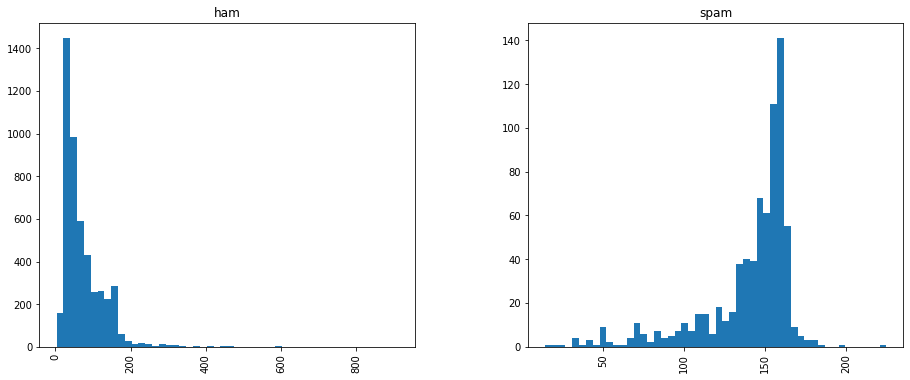

In [304]:
messages.hist(column='length',by='labels',bins=50, figsize=(15,6))

This is clearly visible that most of the spam messages have large number of text( mostly above 130 ) as compared to ham messages(mostly under 100).

## 4. Modelling and Prediction:

### Create message text processor

In [305]:
def process_text(text):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [306]:
messages['message'].apply(process_text).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Splitting Dataset and Model Creation

In [317]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])


In [318]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['labels'])

In [319]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x000001C085257948>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [320]:
predictions = pipeline.predict(msg_test)

In [321]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1213
        spam       1.00      0.75      0.86       180

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



### Observation

Using Naive Bayes classifier, we got fairly good results as we can see above recall, f1-score under classification report. 